In [126]:
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 

In [127]:
df = pd.read_csv('3_clean_zomato_feat.csv')
df['rest_price_idr'] = df['rest_price_idr'] / 1000
df['rest_price_idr'] = df['rest_price_idr'].astype(int)
# df['rank_res_type'] = df['rank_res_type'].astype(int)
# df['rank_fac'] = df['rank_fac'].astype(int)

In [128]:
df.isnull().sum()

index                0
url                  0
rest_price_idr       0
review               0
lat                  0
long                 0
is_chain             0
rating               0
new_code_res_type    0
rank_res_type        0
new_code_fac         0
rank_fac             0
dtype: int64

In [129]:
df.head()

,index,url,rest_price_idr,review,lat,long,is_chain,rating,new_code_res_type,rank_res_type,new_code_fac,rank_fac
0,0,https://www.zomato.com/jakarta/wakacao-1-kelap...,150,56.0,-6.167531,106.901752,0,3.8,4,0,4,0
1,1,https://www.zomato.com/jakarta/the-coffee-bean...,110,61.0,-6.157341,106.907888,1,3.0,0,91,0,571
2,2,https://www.zomato.com/jakarta/angke-kelapa-ga...,450,363.0,-6.152638,106.892576,0,4.5,2,2,0,649
3,3,https://www.zomato.com/jakarta/ikan-nila-pak-u...,100,113.0,-6.163588,106.903689,0,3.9,0,20,0,4
4,4,https://www.zomato.com/jakarta/hong-kong-sheng...,220,257.0,-6.157255,106.908430,1,4.1,0,270,0,89


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5803 entries, 0 to 5802
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5803 non-null   int64  
 1   url                5803 non-null   object 
 2   rest_price_idr     5803 non-null   int32  
 3   review             5803 non-null   float64
 4   lat                5803 non-null   float64
 5   long               5803 non-null   float64
 6   is_chain           5803 non-null   int64  
 7   rating             5803 non-null   float64
 8   new_code_res_type  5803 non-null   int64  
 9   rank_res_type      5803 non-null   int64  
 10  new_code_fac       5803 non-null   int64  
 11  rank_fac           5803 non-null   int64  
dtypes: float64(4), int32(1), int64(6), object(1)
memory usage: 521.5+ KB


In [131]:
df.isnull().sum()

index                0
url                  0
rest_price_idr       0
review               0
lat                  0
long                 0
is_chain             0
rating               0
new_code_res_type    0
rank_res_type        0
new_code_fac         0
rank_fac             0
dtype: int64

In [145]:
scaler = MinMaxScaler()
Y = scaler.fit_transform(df[['rating']])
X_train, X_test, y_train, y_test = train_test_split(df.drop(['url','index','rating','lat','long','review','new_code_res_type','new_code_fac'],axis=1), Y, test_size=0.3, random_state=42)


# X_train, X_test, y_train, y_test = train_test_split(df.drop(['url','index','rating','lat','long','review','new_code_res_type','new_code_fac'],axis=1), df['rating'], test_size=0.3, random_state=42)

In [146]:
X_train.head()

,rest_price_idr,is_chain,rank_res_type,rank_fac
2618,70,1,11,1
5076,150,0,345,357
1293,300,0,36,91
5142,50,1,87,5
4851,400,1,269,435


In [147]:
regr = RandomForestRegressor(random_state=0,n_estimators=30, max_depth = 10)
# regr = RandomForestClassifier()
regr.fit(X_train, y_train)


<ipython-input-147-749874cfdc06>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=30, random_state=0)

In [148]:
y_result_test = regr.predict(X_test)
y_result_train = regr.predict(X_train)
print(' MAE {} '.format(mean_absolute_error(y_result_test,y_test)))
print(' MSE {} '.format(mean_squared_error(y_result_test,y_test)))
print(' R2 {} '.format(r2_score(y_train,y_result_train)))

 MAE 0.0744210318320723 
 MSE 0.00899452451376542 
 R2 0.4584085161069903 


In [155]:
y_test.reshape(-1,1)

array([[0.67346939],
       [0.69387755],
       [0.55102041],
       ...,
       [0.83673469],
       [0.6122449 ],
       [0.53061224]])

In [158]:
# result_train = pd.DataFrame()
# result_train['score'] = y_result_train
# result_train['type'] = 'train'
# result_train['idx'] = result_train.shape[0]

result_test = pd.DataFrame()
result_test['score'] = y_result_test
result_test['type'] = 'test'
result_test['idx'] = np.arange(result_test.shape[0])

result_test2 = pd.DataFrame()
result_test2['score'] = np.squeeze(y_test)
# result_test2['score'] = y_test
result_test2['type'] = 'train'
result_test2['idx'] = np.arange(result_test2.shape[0])



df_result = pd.concat([result_test2,result_test])
# result = pd.DataFrame({'predict':y_result_test,'real':y_test})
# result['predict'] = y_result_test
# result['real'] = y_test

In [159]:
df_result

,score,type,idx
0,0.673469,train,0
1,0.693878,train,1
2,0.551020,train,2
3,0.734694,train,3
4,0.612245,train,4
...,...,...,...
1736,0.693561,test,1736
1737,0.716988,test,1737
1738,0.799772,test,1738
1739,0.708946,test,1739


<AxesSubplot:xlabel='idx', ylabel='score'>

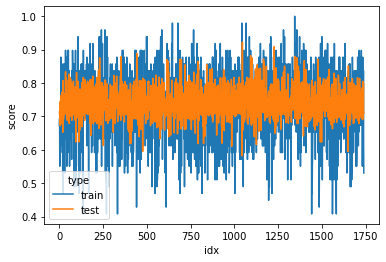

In [160]:
sns.lineplot(data=df_result, x="idx", y='score', hue="type")